In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Carregue o arquivo .xlsx
file_path = 'C:/Winpython/A418_H_BOM_JESUS_DA_LAPA_BA_TESTE.xlsx'


In [9]:
meses_nomes_portugues = {
    1: 'Jan',
    2: 'Fev',
    3: 'Mar',
    4: 'Abr',
    5: 'Mai',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Set',
    10: 'Out',
    11: 'Nov',
    12: 'Dez'
}

# ``2m TEMPERATURE (t2m)``

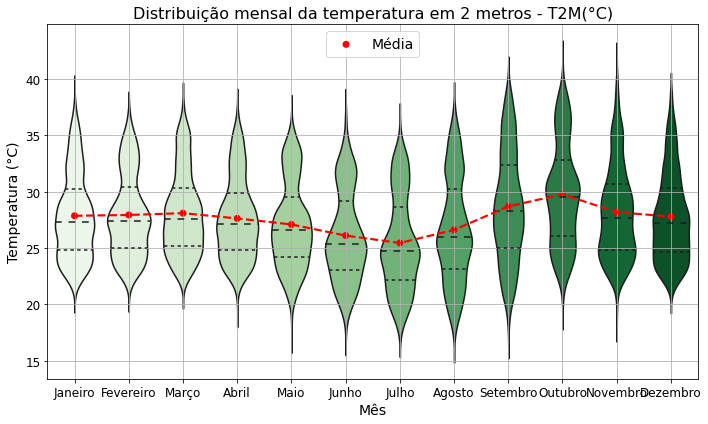

    mes  Média de Temperatura (°C)
0     1                  27.867218
1     2                  27.939198
2     3                  28.098357
3     4                  27.632028
4     5                  27.095954
5     6                  26.110686
6     7                  25.453713
7     8                  26.615930
8     9                  28.696025
9    10                  29.775516
10   11                  28.187317
11   12                  27.795105


In [6]:


coluna_dados = 'T2M(°C)'  # Substitua 'nome_da_coluna' pelo nome da coluna com os dados
df = pd.read_excel(file_path)

# Certifique-se de que a coluna contendo as datas esteja no formato datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Passo 2: Criar um novo campo de mês
df['mes'] = df['Timestamp'].dt.month

# Passo 3: Plotar o violinplot com a distribuição por mês
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura
sns.violinplot(data=df, x='mes', y=coluna_dados, palette='Greens', inner='quartile')
plt.xlabel('Mês', fontsize=14)  # Aumentar o tamanho da fonte do texto do eixo x
plt.ylabel('Temperatura (°C)', fontsize=14)  # Aumentar o tamanho da fonte do texto do eixo y
plt.title('Distribuição mensal da temperatura em 2 metros - ' + coluna_dados, fontsize=16)  # Aumentar o tamanho da fonte do título

# Passo 4: Plotar o ponto médio de cada mês com um pontoplot
df_media_por_mes = df.groupby('mes')[coluna_dados].mean().reset_index()
sns.pointplot(data=df_media_por_mes, x='mes', y=coluna_dados, color='red', markers='o', linestyles='--', label='Média', scale=0.8)
plt.legend(loc='upper center', fontsize=14)  # Aumentar o tamanho da fonte da legenda da média

# Substituir os valores numéricos pelos nomes dos meses em português no eixo x
meses_nomes_portugues = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
plt.xticks(ticks=df_media_por_mes['mes'] - 1, labels=[meses_nomes_portugues[mes] for mes in df_media_por_mes['mes']], fontsize=12)

# Aumentar o tamanho da fonte dos valores dos eixos x e y
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Mês', fontsize=14)  # Aumentar o tamanho da fonte do texto do eixo x
plt.ylabel('Temperatura (°C)', fontsize=14)

plt.tight_layout()
plt.grid(True)
plt.show()

# Exibir as médias por mês em um DataFrame
df_media_por_mes = df_media_por_mes.rename(columns={coluna_dados: 'Média de Temperatura (°C)'})
print(df_media_por_mes)
